# Solid State Physics of 1D Chains

In [1]:
import numpy as np
from scipy.sparse import diags
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction

This notebook considers a simple model solid – 50 hydrogen atoms on a ring. It is a model 1D problem where the electronic and vibrational spectrum can be treated seperately, since the internal energy of a solid (or molecule) can in general be decomposed into two components:

$$ U_{int} = E_{static} + E_{vib} $$

where $E_{static}$ is the electronic ground state energy with a fixed lattice and $E_{vib}$ is the additional energy due to lattice motion. Generally, in normal conditions (and temperatures), we do not expect phonons and electron to interact. Hence, we compute the vibrational and electronic spectrum seperately.

The code is general for a 1D chains, no extra steps needed for parameter changes.

#### Spring constant

To construct this model, we first consider fitting a spring constant that governs the dynamics of the linked Hydrogen chain. For H_2 dimer, we simply consider its vibrational spectroscopy spectrum, $4000 cm^{-1}$ to calculate the spring constant:

\begin{equation} \label{eq:1}
\tilde{v} (cm^{-1})= \frac{1}{2 \pi c} \sqrt{\frac{k}{\mu}}
\end{equation}

where the reduced mass is:

\begin{equation} \label{eq:2}
\begin{aligned}
\mu &= \frac{m_1 m_2}{m_1 + m_2} \\
&= \frac{(1.008u)^2}{2(1.008u)} \\
&= 8.37 \times 10^{-28} kg
\end{aligned}
\end{equation}

such that:

\begin{equation} \label{eq:3}
\begin{aligned}
k &= \bigg(\frac{2 \pi c}{\lambda^2} \bigg)^2 \mu \\
&= 476 N/m
\end{aligned}
\end{equation}

### Vibrational Spectrum

We compute and plot the vibrational spectrum of the 'solid' in the first Brillouin zone. For a 1D monatomic chain, we know the phonon frequencies that govern the lattice dynamics are given by:

$$\omega = \sqrt{\frac{4c}{m}} \sin \bigg( \frac{|ka|}{2} \bigg)$$

where $k$ is the wavevector in the first Brillouin zone, $c$ is the spring (relabeled c from k to avoid confusion with the wavevector), $\omega$ is the frequency spectrum and $a$ is the inter atomic distance between the Hydrogen atoms.

Since there are 50 atoms in the chain, by Bloch's theorem, the values of $k$ in the first Brillouin zone are restricted to:

$$k = \frac{2\pi n}{50 a}$$

for 50 $n$ values such that $-\frac{\pi}{a} \leq k \leq \frac{\pi}{a}$

We compute the frequency $\omega$ for each value of of $k$ in this zone to display the vibrational spectrum. 

In [2]:
#Define parameters

N = 50           #number of atoms in chain
c = 475          #force constant (N/m)
a = 1e-10        #interatomic distance (m)
m = 1.67e-27     #atom mass

In [3]:
#Define points in first BZ 

k = []

for i in range(int(-N/2),int(N/2)):
    k_i = (2*np.pi*i)/(N*a)
    k.append(k_i)

In [4]:
#Compute frequency eigenvalues

omega = []

for i in range(len(k)):
    omega_i = np.sqrt((4*c)/m)*np.sin(abs(k[i]*a)/2)   #using dispersion relation above
    omega.append(omega_i)

Text(0.5, 1.0, 'Vibrational Spectrum')

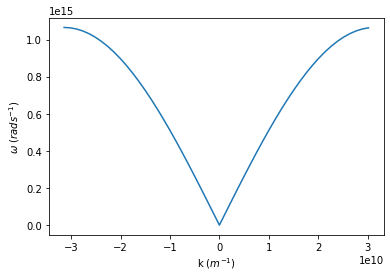

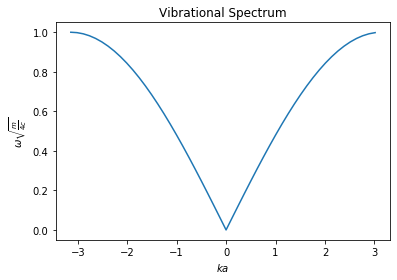

In [5]:
#Plot spectrum using actual values

plt.figure()
plt.plot(k,omega)
plt.xlabel(r'k ($m^{-1}$)')
plt.ylabel(r'$\omega$ ($rad s^{-1}$)')


#Scale axis and plot spectrum

omega_scaled = [i * np.sqrt(m/(4*c)) for i in omega]
k_scaled = [i * a for i in k]

plt.figure()
plt.plot(k_scaled,omega_scaled)
plt.xlabel(r'$ka$')
plt.ylabel(r'$\omega \sqrt{\frac{m}{4c}}$')
plt.title('Vibrational Spectrum')

Here, we find the eigenvalue corresponding to the wave vector of $\frac{\pi}{a}$.

In [6]:
#Find eigenvalue corresponding to k = pi/a

k_edge = omega[N-1]  
print(k_edge, 'rad s^-1')

1064536942499113.8 rad s^-1


In order to find its corresponding eigenvector, we consider constructing the force constant matrix. We know that the frequency eigenvalues can also be recoverd via the generalised eigenvalue problem:

$$(M^{-1} K - \omega^2 I_4) \vec{x} = 0 $$

where $M$ is the matrix of masses (a diagonal matrix that is easily inverted) and $K$ is the force constant matrix for the system, which for a 1D ring has the form:

\begin{bmatrix} 
    2c & -c & 0 & 0 & \dots & -c\\
    -c & 2c & -c & 0 & \dots & 0\\
    0 & -c & 2c & -c & \dots & 0\\
    0 & 0 & -c & 2c & \dots & 0\\
    \vdots & \vdots & \vdots & \vdots & \ddots & -c\\
    -c & 0 & 0 & 0 & -c & 2c 
    \end{bmatrix}

Hence, solving the eigenvalue problem with gives us a list of equivalent frequencies, and we can search for the corresponding eigenvector.


In [7]:
#Construct force constant matrix

#diagonal elements
diag1 = np.full((N,),2*c)
diag2 = np.full((N-1,),-c)
diag3 = np.full((1,),-c)

diagonals = [diag1, diag2, diag2, diag3, diag3]
theta = diags(diagonals, [0, -1, 1, -(N-1), (N-1)]).toarray()
print(theta)

[[ 950. -475.    0. ...    0.    0. -475.]
 [-475.  950. -475. ...    0.    0.    0.]
 [   0. -475.  950. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  950. -475.    0.]
 [   0.    0.    0. ... -475.  950. -475.]
 [-475.    0.    0. ...    0. -475.  950.]]


In [8]:
#Form inverse mass matrix

diag = np.full((N,), 1/m)
M_inv = diags(diag, 0).toarray()

In [9]:
#Compute frequency eigenvalues

eigvals, eigvecs = np.linalg.eig(M_inv @ theta)
omega = []

for i in range(len(eigvals)):
    omega_i = np.sqrt(eigvals.round(5)[i]) 
    omega.append(omega_i)

C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [10]:
#Find index corresponting to k = pi/a

k_edge_index = np.where(np.floor(k_edge) == np.floor(omega))[0][0]


#Find corresponding eigenvector

k_edge_eigval = eigvecs[:,k_edge_index - 1]
print(r'Eigenvector for k = pi/a =', k_edge_eigval)

Eigenvector for k = pi/a = [-0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136 -0.14142136  0.14142136 -0.14142136  0.14142136
 -0.14142136  0.14142136]


To construct the corresponding displacement vector, we note:

$$ u_n = \delta e^{i(k n a -\omega t)} $$

where $u_n$ is the displacement of the $n^{th}$ atom in the chain. For the wavevector $k = \frac{\pi}{a}$, this reduces to:

$$ u_n = \delta e^{i \pi n} e^{-i \omega t}$$

for which $e^{i \pi n}$ simply varies between 1 and -1, suggesting that each neighbouring atom moves in opposite directions:

In [11]:
#Construct displacement vector for this mode

u = []

for n in range(N):
    u_n = np.real(np.exp(1j*np.pi*n))
    u.append(u_n)

print(u)

[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0]


Hence, the displacement vector would be $u_n = \delta e^{-i \omega t} u$, where $u$ is the above vector of 1's and -1's.

### Electronic Spectrum

To compute the electronic energies (band structure) of the chain, we use the nearest neighbor tight-binding approximation. We consider a single s-band in the 1D chain. in this scheme, we know that the dispersion relation and bandwidth is described by:

$$ E(k) = E_0 + 2\beta(d) cos(kd)$$

where $E_0$ is the on site ground state energy, $d$ is the interatomic distance and $\beta(d)$ is the hopping integral, given by $\beta(d) = -\frac{A}{d^2}$, with $A = 1.6 eV Å^2$. Hence, for each allowed k point, we compute the corresponding electronic energy. First we consider the atoms in their equilibruim positions, $d = a = 1.0 Å$:

In [12]:
#Compute the electronic dispersion relation

E_0 = 0                   #on-site energy
A = 1.6


def beta(d):              #hopping integral
    return -A/((d/1e-10)**2)  


def E(k_points):          #dispersion relation
    
    E = []
    for k in range(len(k_points)):
        E_k = E_0 + 2*beta(a)*np.cos(a*k_points[k])
        E.append(E_k)
    
    return E

Text(0, 0.5, '$E(k) (eV)$')

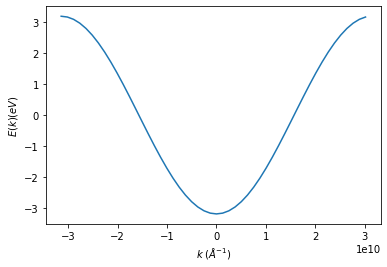

In [13]:
#Plot tight binding energies in first BZ

plt.figure()
plt.plot(k, E(k))
plt.xlabel(r'$k$ $(\AA{}^{-1})$')
plt.ylabel(r'$E(k) (eV)$')

If we assume one electron per atom, by the Pauli principle we can count up states to give us the total electronic energy. We constructed our model with s orbitals, so each allowed k state can be occupied by two electrons; spin up and spin down. Since the number of the electrons is equal to the number
of sites, the ground state of the ring is constructed by filling the lower half ( $E(k) < 0$ ) of the band dispersion. We can count the states below this energy by using the density of states relation:

$$g(E) = \frac{50 a}{2\pi} |\frac{dk}{dE}| $$

where:

$$|\frac{dk}{dE}| = \frac{1}{a}\frac{1}{\sqrt{4\beta^2 - (E - E_0)^2}}$$

by taking the derivative of the dispersion relation.



C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0, 0.5, 'Number of states')

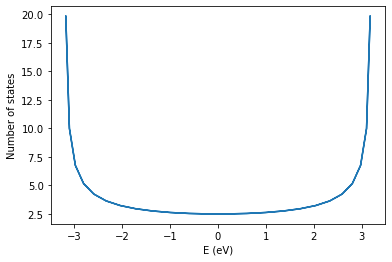

In [14]:
#Plot density of states as a function of energy

def g(E):
    
    num_states = []
    
    for i in range(len(E)):
        num_E = (N/(2*np.pi))*(1/np.sqrt(4*(beta(a)**2) - (E[i])**2))
        num_states.append(num_E)
    
    return num_states


plt.figure()
plt.plot(E(k),g(E(k)))
plt.xlabel('E (eV)')
plt.ylabel('Number of states')

In [15]:
#Compute total electronic energy of ring

#define continuous DOS function that is suitable for integration
def dos(E):
    dos = (N/(2*np.pi))*(1/np.sqrt(4*(beta(a)**2) - (E)**2))
    return dos

#integrate up to half filled band
elec_energy = integrate.quad(lambda x: dos(x), -3.2, 0)
print('Total electronic energy:', elec_energy[0], 'eV')

Total electronic energy: 12.50000000002232 eV


#### Elastic Energy

We can compute the total elastic energy by considering the displacement vector of the atoms. We approximate: $ E_{elas} = \frac{1}{2}c x^2 $, where c is the spring constant and x is the atom's displacement from its equilibrium position. For the $k = \frac{\pi}{a}$ mode, each atom moves in the opposite direction to its neighbouring atom, such that $E_{elas} = \frac{1}{2}c (2d)^2$. We sum over the individual energies over the 50 atoms:

$$E_{elas} = 25 \frac{c}{2} (2 \delta)^2 + 25 \frac{c}{2} (-2 \delta)^2 = 100c \delta^2 $$

In [16]:
#Compute the total elastic energy for various dispacement amplitudes

#10 different amplitudes from 0 to 0.3 Angstroms
amplitudes = np.linspace(0, 0.3*1e-10, 11, endpoint=True)

total_elas_energy = []

for i in range(len(amplitudes)):
    elas_energy = (N/2)*c*(2*amplitudes[i])**2
    total_elas_energy.append(elas_energy/1.6e-19)

print('Some total elastic energies for amplitudes between 0 - 0.3 A:', total_elas_energy, 'eV')


Some total elastic energies for amplitudes between 0 - 0.3 A: [0.0, 2.6718750000000004, 10.687500000000002, 24.04687500000001, 42.75000000000001, 66.796875, 96.18750000000004, 130.92187500000003, 171.00000000000003, 216.42187500000003, 267.1875] eV


### Electronic energies for various displacement patterns

To compute the electronic energies for the chain when the atoms are not in their equilibrim positions ($k = \frac{\pi}{a}$), we refine our tight binding model to include two atoms in the unit cell. In this scheme the secular matrix is not 1x1 anymore, but 2x2:

   \begin{bmatrix} 
    -E_0 & \beta(a - 2d) + \beta(a + 2d)e^{2ika} \\
    \beta(a - 2d) + \beta(a + 2d)e^{-2ika} & -E_0 \\
    \end{bmatrix}

for which we find the determinant, giving two band solutions. Here our lattice vector changes to 2a, so we redefine the points in our 1st Brillouin zone.

In [17]:
#Define points in first BZ 
k = []

for i in range(int(-N/2),int(N/2)):
    k_i = (2*np.pi*i)/(N*2*a)
    k.append(k_i)


#Compute electronic band energy for displaced states

def tb_eigenvals(E, d, k):
    '''
    E : onsight energy
    d : atomic phonon displacement
    k : wavevectors
                                    
    returns: array shape (2,) of tight binding eigenvalues
    '''

    tb_hamiltonian = np.array([ [-E, beta(a-2*d) + beta(a+2*d)*np.exp(1j*k*2*a)],
                                [beta(a-2*d) + beta(a+2*d)*np.exp(-1j*k*2*a), -E_0] ])
    
    eigvals = np.linalg.eigvalsh(tb_hamiltonian)
    eigvals.sort()
    
    return eigvals

    
def band(displacement):
    '''
    Band structure given atomic displacement from equilibrium
    '''
    
    amplitude_eigenvals = []
    
    for i in range(len(k)):
        eigvals = tb_eigenvals(E_0, displacement, k[i])
        amplitude_eigenvals.append(eigvals)
        
    return np.stack(amplitude_eigenvals)


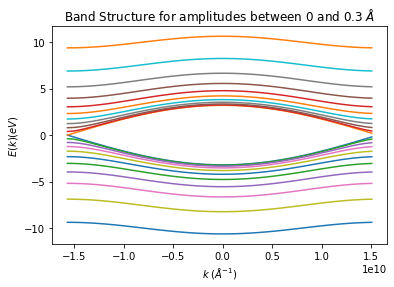

In [18]:
#Plot electronic structures for each amplitude

for i in range(len(amplitudes)):
    plt.plot(k, band(amplitudes[i]))
    plt.xlabel(r'$k$ $(\AA{}^{-1})$')
    plt.ylabel(r'$E(k) (eV)$')
    plt.title(r'Band Structure for amplitudes between 0 and 0.3 $\AA{}$')

Here, the bands closest to $E=0$ describe amplitudes close to $d=0Å$, and those furthest describe larger amplitudes close to $d=0.3 Å$

In this scheme, the entire lower bands are ocupied, while the upper bands are empty. We can now find the total energy of the 'solid' by applying our first equation: 

$$ U_{int} = E_{static} + E_{vib} $$

We count the total energy by counting the states of the lower band via the Pauli principle.

Text(0, 0.5, 'Total ring energy (eV)')

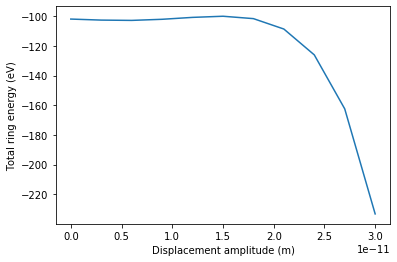

In [19]:
#Compute the total electric energy for various dispacement amplitudes

total_elec_energy = []

for i in range(len(amplitudes)):
    elec_energy = sum(band(amplitudes[i])[:,0])    
    total_elec_energy.append(elec_energy)
    

#Compute and plot total energy

total_energy = np.add(total_elec_energy, total_elas_energy)
plt.figure()
plt.plot(amplitudes, total_energy)
plt.xlabel('Displacement amplitude (m)')
plt.ylabel('Total ring energy (eV)')

We can see that the energy that minimizes $E_{tot}$ is approximately at $d = 1.5 Å$. We serch explicitly for the index of the array that corresponds to this and calculate its band gap:

In [20]:
#Find displacement that gives minimum energy and its corresponding band structure

min_energy_index = np.argmax(total_energy)
min_energy = band(amplitudes[min_energy_index])

#Find band gap
#note the second column is the higher band and the first column is the lower band
band_gap = np.min(min_energy[:,1]) - np.max(min_energy[:,0]) 
print('The band gap of the minimum energy configuration is:', band_gap, 'eV')

The band gap of the minimum energy configuration is: 4.6371211206376035 eV
